In [1]:
import umap
import sklearn.datasets
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

/Users/mmastalerczyk/opt/anaconda3/envs/umap2/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


###   t-SNE, UMAP and LargeVis

In this and the next notebook we will use manifold learning for data visualization of large data sets (with high dimensionality). In addition to t-SNE, two relatively new methods will be used that are more efficient on large data sets.


- UMAP (Uniform Manifold Approximation and Projection) - Install this Python package: https://umap-learn.readthedocs.io/en/latest/index.html. UMAP package is compatible with scikit-learn, making use of the same API and able to be added to sklearn pipelines. UMAP can work as a drop in replacement for t-SNE and other dimension reduction classes from scikit-learn


- LargeVis (Visualizing Large-scale and High-dimensional Data) - Many techniques (like t-SNE, UMAP and LargeVis) first compute a similarity structure of the data points and then project them into a low-dimensional space with the structure preserved. These two steps suffer from considerable computational costs Comparing to tSNE, LargeVis significantly reduces the computational cost of the graph construction step and employs a principled probabilistic model for the visualization step, the objective of which can be effectively optimized through asynchronous stochastic gradient descent with a linear time complexity. Download this algorithm repository and follow the installation instructions. https://github.com/lferry007/LargeVis


In [2]:
from sklearn.manifold import TSNE

To get data we use the sklearn.datasets.fetch_openml method, which as the name requires, Fetch dataset from openml by name or dataset id. We will use MNIST and Fashion-MNIST(Zalando's article images). Fashion-MNIST is intended to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. Instead of numbers it contains thumbnails of clothes images.

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

mnist = sklearn.datasets.fetch_openml('mnist_784')
fmnist = sklearn.datasets.fetch_openml('Fashion-MNIST')

Below are drawings of some samples from mnist and fmnist data sets

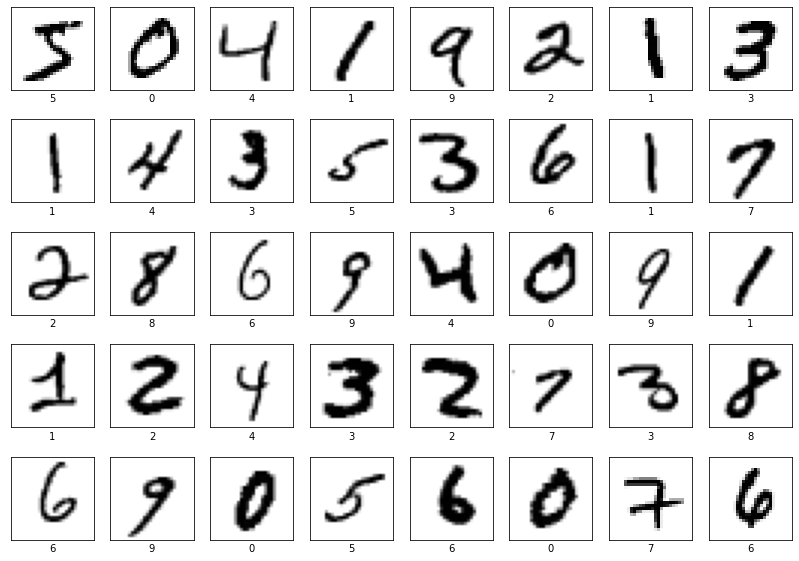

In [4]:
mnist_names = [i for i in range(10)]
plt.figure(figsize=(14,10))
for i in range(40):
    plt.subplot(5, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(mnist.data.iloc[i,:].to_numpy().reshape((28, 28)), cmap=plt.cm.binary)
    plt.xlabel(mnist_names[int(mnist.target[i])])
plt.show()

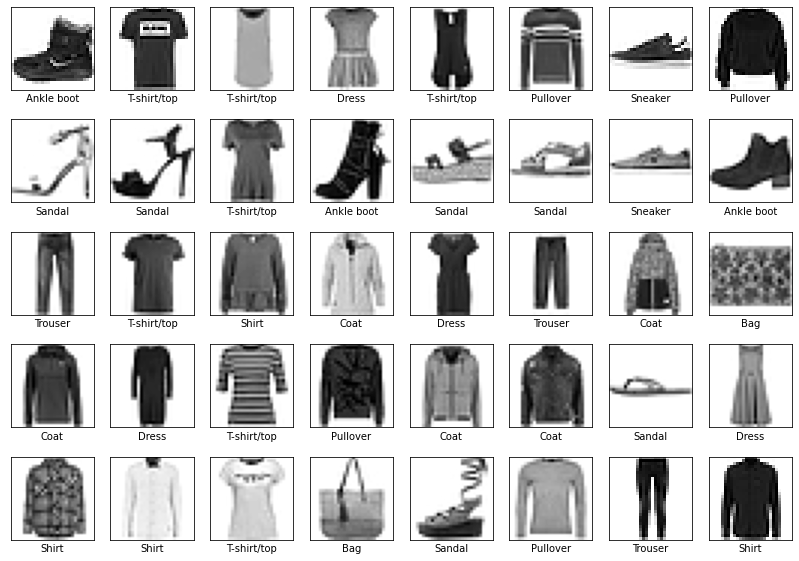

In [5]:
fmnist_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
 
plt.figure(figsize=(14,10))
for i in range(40):
    plt.subplot(5, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(fmnist.data.iloc[i,:].to_numpy().reshape((28, 28)), cmap=plt.cm.binary)
    plt.xlabel(fmnist_names[int(fmnist.target[i])])
plt.show()

#### Use t-SNE, UMAP and LargeVis to project mnist and fmnist data sets into a 2-dimensional space. For LargeVis, you need to create a function that saves the data to the required by LargeVis txt file format, and a function that loads the resulting file. Draw charts for all visualizations.

In [39]:
def plot_2d_mnist_scatter(X, y):
    fig, plot = plt.subplots()
    fig.set_size_inches(16, 16)
    plt.prism()

    for i in range(10):
        digit_indeces = (y == str(i))
        dim1 = X[digit_indeces,0]
        dim2 = X[digit_indeces,1]
        plot.scatter(dim1, dim2, label=f'Digit {i}')

    plot.set_xticks(())
    plot.set_yticks(())

    plt.tight_layout()
    plt.legend()
    plt.show()


In [7]:
def plot_2d_fmnist_scatter(X, y):
    fig, plot = plt.subplots()
    fig.set_size_inches(16, 16)
    plt.prism()

    for i in range(10):
        digit_indeces = (y == str(i))
        dim1 = X[digit_indeces,0]
        dim2 = X[digit_indeces,1]
        plot.scatter(dim1, dim2, label=fmnist_names[i])

    plot.set_xticks(())
    plot.set_yticks(())

    plt.tight_layout()
    plt.legend()
    plt.show()

## TSNE

In [8]:
tsne = TSNE(n_components=2, metric='euclidean', perplexity=20)
mnist_tsne = tsne.fit_transform(mnist.data.to_numpy(), mnist.target.to_numpy())

/Users/mmastalerczyk/opt/anaconda3/envs/umap2/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/mmastalerczyk/opt/anaconda3/envs/umap2/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


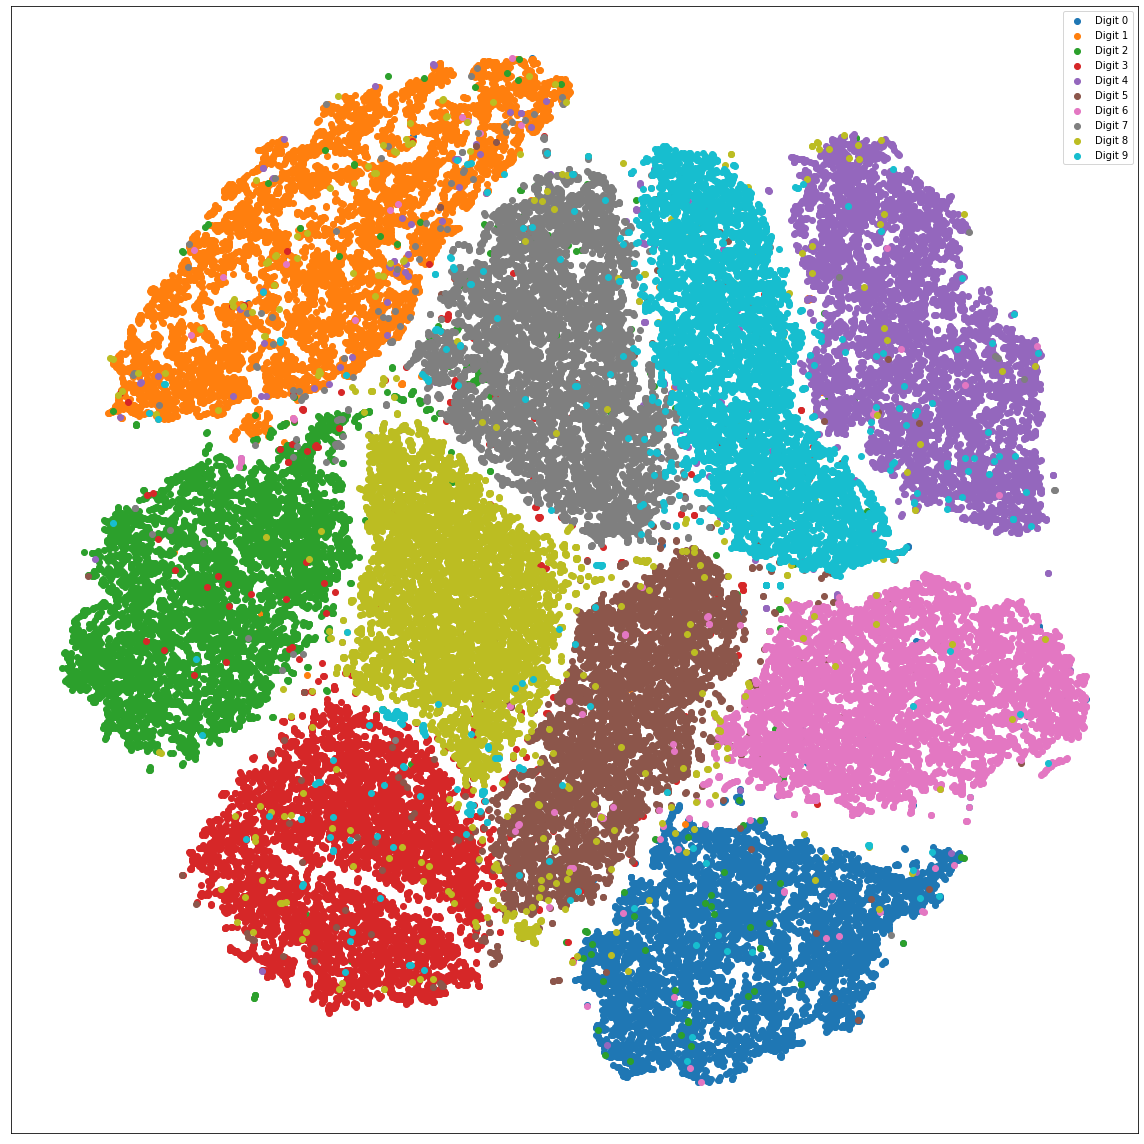

In [40]:
plot_2d_mnist_scatter(mnist_tsne, mnist.target.to_numpy())

In [10]:
f_tsne = TSNE(n_components=2, metric='euclidean', perplexity=20)
fmnist_tsne = f_tsne.fit_transform(fmnist.data.to_numpy(), fmnist.target.to_numpy())

/Users/mmastalerczyk/opt/anaconda3/envs/umap2/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/mmastalerczyk/opt/anaconda3/envs/umap2/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [11]:
print(fmnist.target.to_numpy())

['9' '0' '0' ... '8' '1' '5']


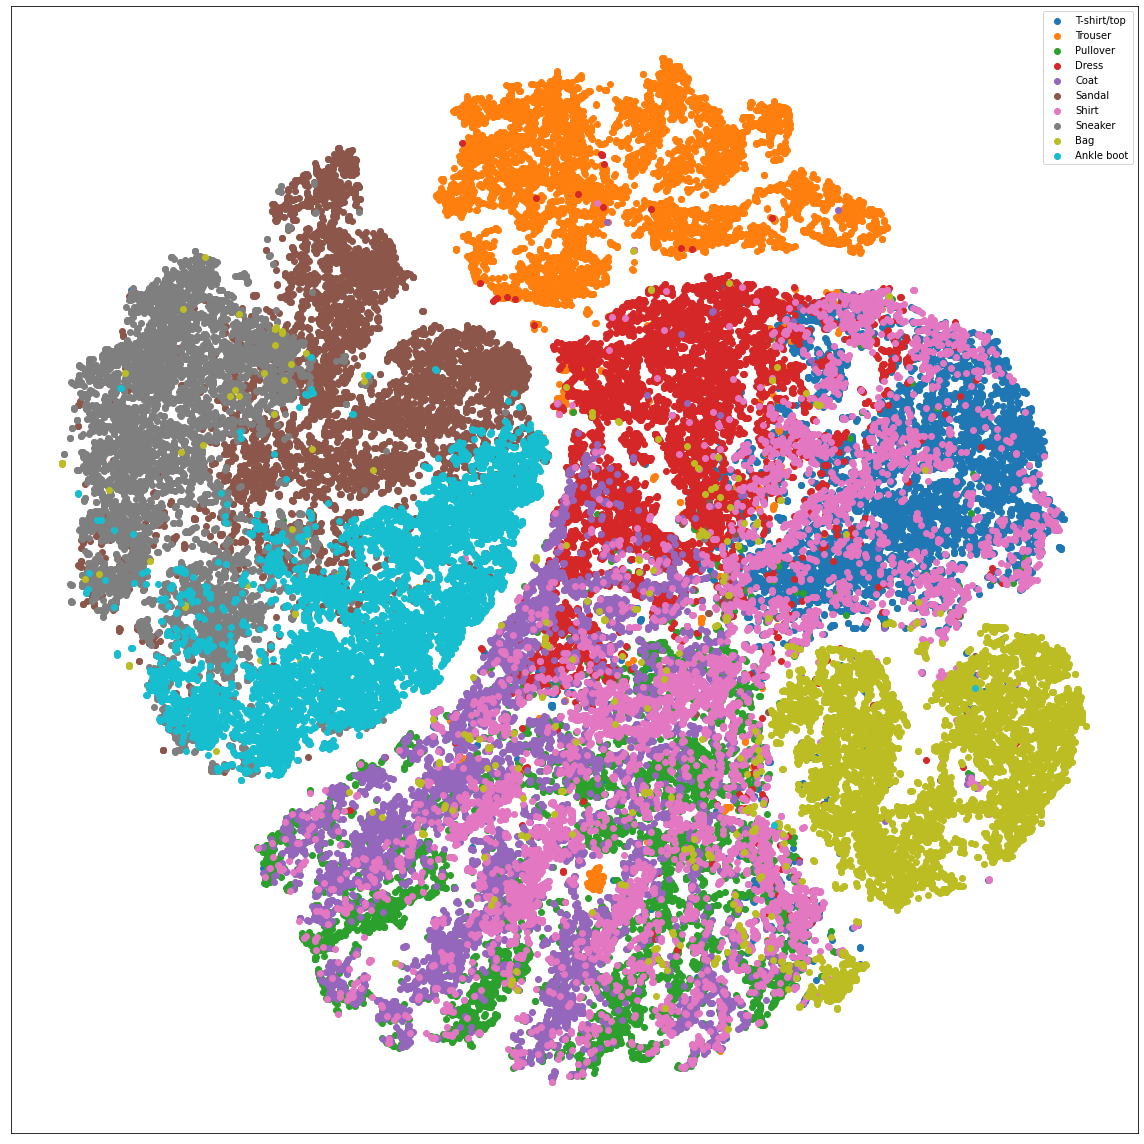

In [12]:
plot_2d_fmnist_scatter(fmnist_tsne, fmnist.target.to_numpy())

## UMAP

In [13]:
umap_mnist = umap.UMAP().fit(mnist.data)

OMP: Info #273: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


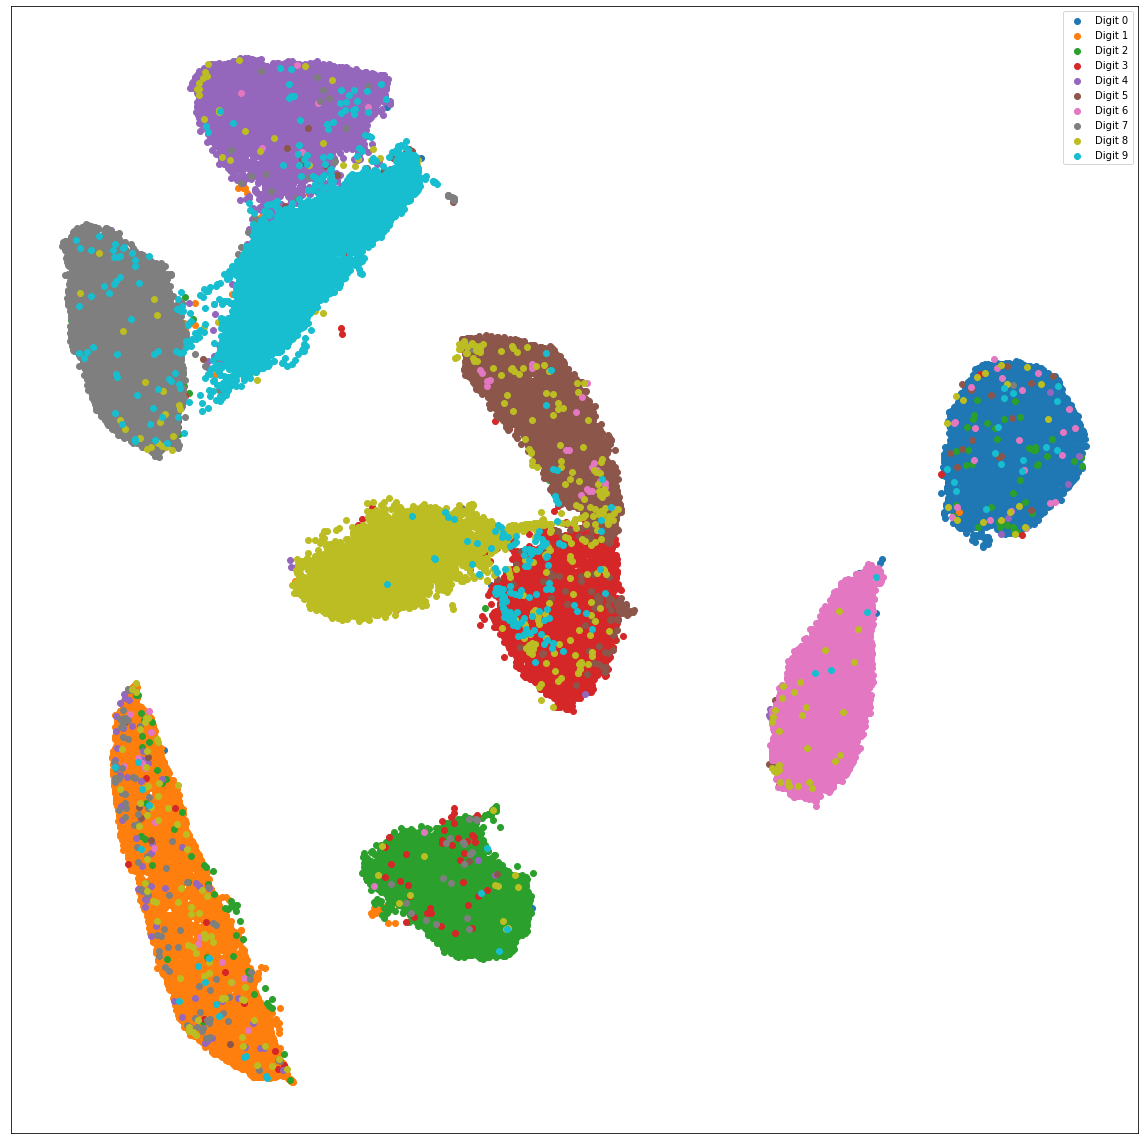

In [41]:
plot_2d_mnist_scatter(umap_mnist.embedding_, mnist.target)

In [15]:
umap_fmnist = umap.UMAP().fit(fmnist.data)

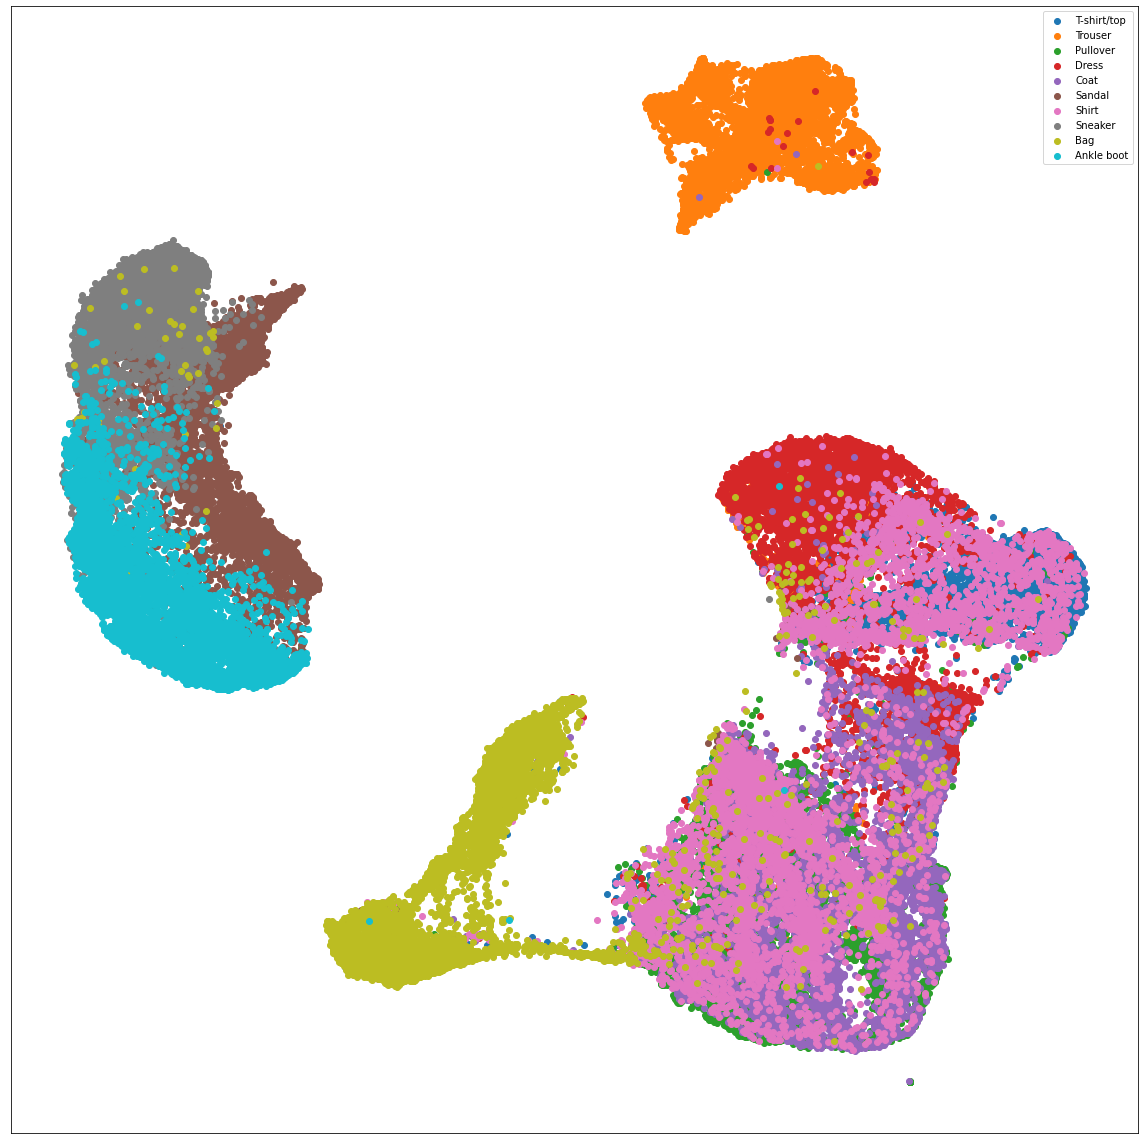

In [17]:
plot_2d_fmnist_scatter(umap_fmnist.embedding_, fmnist.target)

W wizualizacjach UMAP z latowscia mozemy wyznacyc z kazda klas, ponadto mozemy zauwazyc globalne zaleznosci, jak np. '1' jest odzzielnym klastrem, a '3', '2' i '5' gdzie mozamy doszukac sie pewnych cech wspolnych sa blisko siebie

## LargeViz

In [18]:
largevis_labels = np.genfromtxt('./mnist_label.csv')
largevis_points = np.genfromtxt('./mnist_vec2D.csv')

In [19]:
largevis_labels = np.array([int(x) for x in largevis_labels])

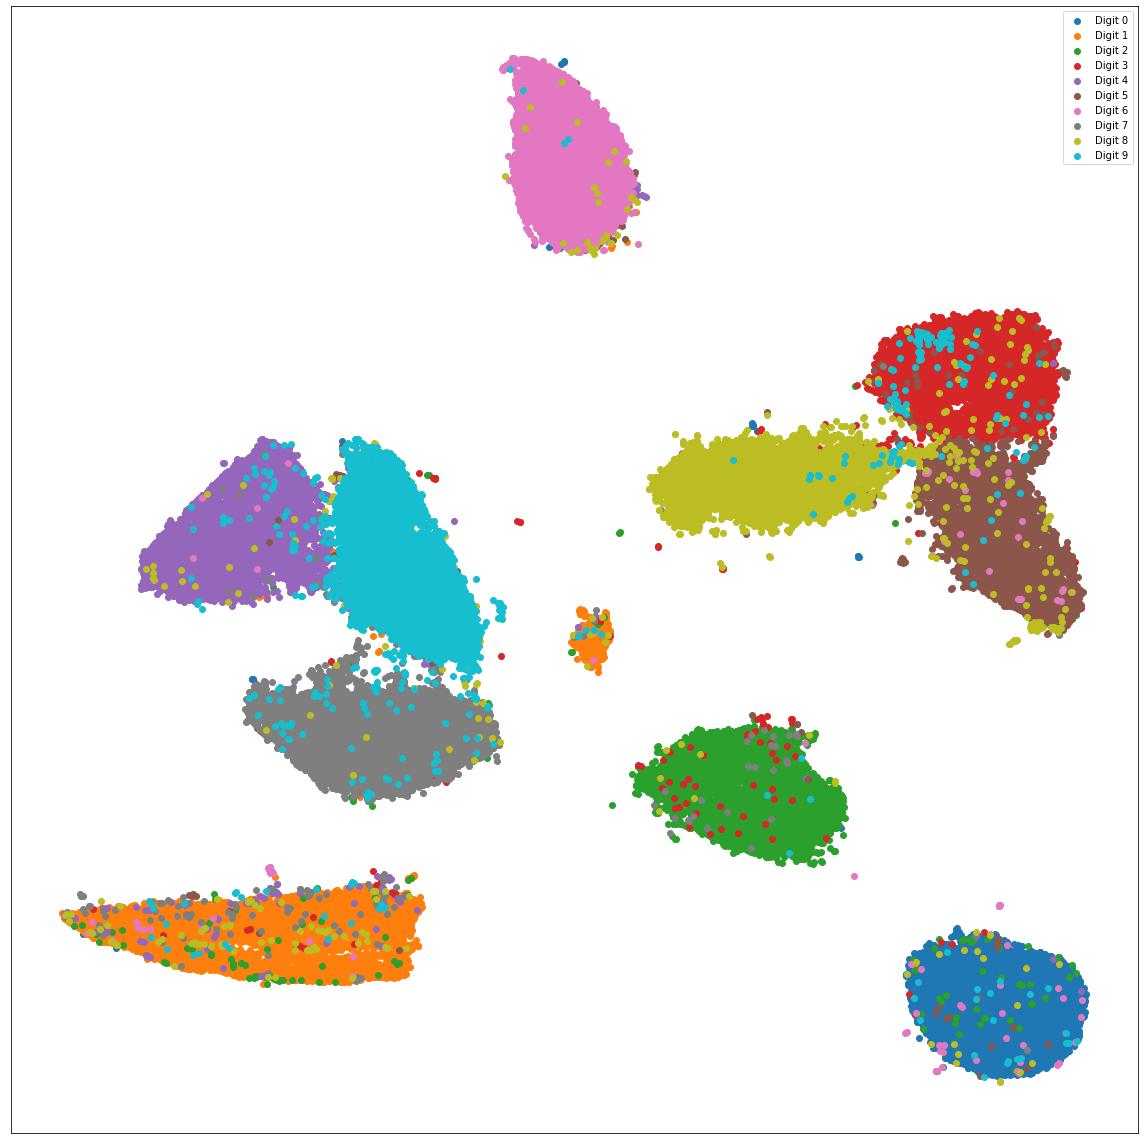

In [20]:
plot_2d_mnist_scatter(largevis_points, largevis_labels)

In [21]:
with open('fmnist_data.txt', 'w') as f:
    shape = fmnist.data.shape
    f.write(f'{shape[0]} {shape[1]}\n')
    for i in range(shape[0]):
        row = fmnist.data.iloc[i].to_numpy()
        values = []
        for r in row:
            values.append(f'{r} ')
        f.write(''.join(values)+ '\n')

In [22]:
fmnist_largevis_points = np.genfromtxt('./fmnist_vec2D.csv')

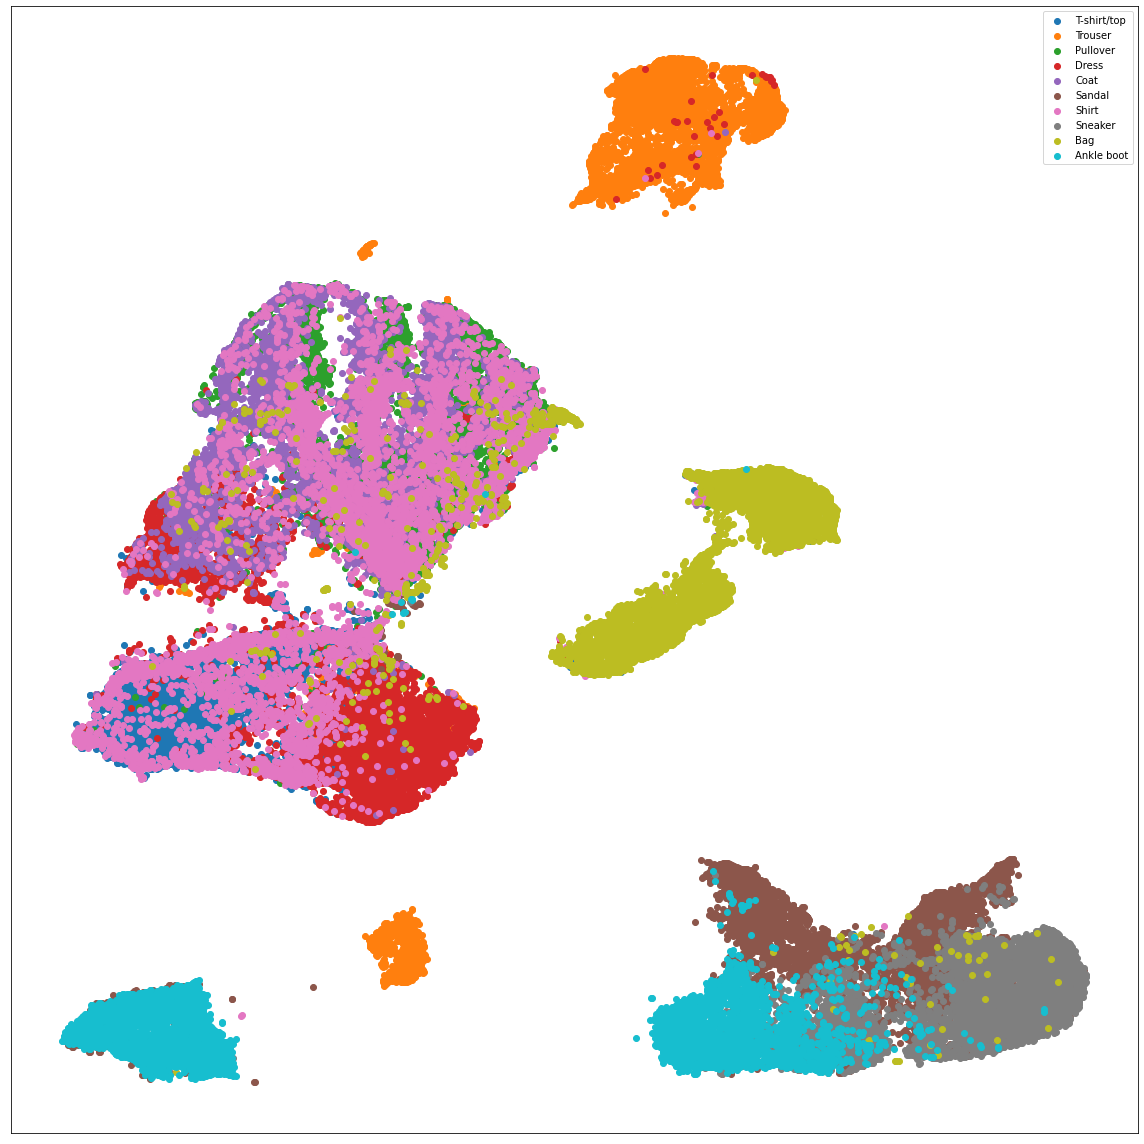

In [23]:
plot_2d_fmnist_scatter(fmnist_largevis_points, fmnist.target.to_numpy())

Largviz dobrze poradzil sobie ze zbiorem mnist, wydzielajac klustry dla kazdej z cyfr, ponownie mamy np. grupe cyfr '8', '3' i '5' analogicznie jak UMAP, dla zbioru fmnist widizmy dobrze poradzil sobie z klasami takimi jak 'Trouser', czy 'Bag', czy 'Ankle boot', za to z reszta juz tak dobrze mu nie poszlo, jak np. 'Dress' i 'Coat', ktore de facto na obrazkach moga podobnie do siebie wygladac.

#### In order to compare the results of these three methods, calculate for each case the average distance between two points belonging to the same class divided by the average distance between points belonging to 2 different classes

In [24]:
from scipy.spatial.distance import cdist

In [35]:
def average_dist_within_class(X, y):
    result_per_label = {}
    for label in np.unique(y):
        class_points = X[np.where(y == label)[:1000]]
        n = class_points.shape[0]
        result_per_label[label] = (np.sum(cdist(class_points, class_points)) / 2) / (((n ** 2) / 2) - n)

    result_per_label['sum'] = sum(result_per_label.values()) / 10

    return result_per_label

## MNIST

In [36]:
mnist_label = mnist.target.to_numpy().astype(np.int8)

mnist_metrics = [
    (mnist_tsne, mnist_label, 'TSNE'),
    (umap_mnist.embedding_, mnist_label, 'UMAP'),
    (largevis_points, mnist_label, 'LARGEVIS')
]
pd.concat(map(lambda e:
        pd.DataFrame.from_dict(e[0], orient='index', columns=[e[1]]),
        map(lambda e: (average_dist_within_class(e[0], e[1]), e[2]), mnist_metrics)), axis=1)

,TSNE,UMAP,LARGEVIS
0,15.256314,1.560832,5.194683
1,19.725101,2.843609,9.960407
2,16.708349,2.050339,5.848728
3,15.752707,1.610904,6.019887
4,17.214573,1.979879,5.659464
5,15.466847,1.868757,6.344936
6,14.983712,1.707299,6.087135
7,15.078900,1.932721,5.467758
8,15.696958,2.016527,6.513242
9,18.705043,2.259549,6.969543


## FMNIST

In [37]:
fmnist_label = fmnist.target.to_numpy().astype(np.int8)

fmnist_metrics = [    (fmnist_tsne, fmnist_label, 'TSNE'),
    (umap_fmnist.embedding_, fmnist_label, 'UMAP'),
    (fmnist_largevis_points, fmnist_label, 'LARGEVIS')]

pd.concat(map(lambda m:
        pd.DataFrame.from_dict(m[0], orient='index', columns=[m[1]]),
        map(lambda m: (average_dist_within_class(m[0], m[1]), m[2]), fmnist_metrics)), axis=1)

,TSNE,UMAP,LARGEVIS
0,20.021746,2.769477,8.065303
1,20.322991,2.691893,21.152785
2,25.543460,2.870152,9.248402
3,18.004136,3.116999,10.764941
4,25.900744,3.000543,9.550882
5,18.484603,2.761244,10.003537
6,33.163772,4.412165,13.155367
7,18.554218,2.053160,6.974088
8,18.276875,3.036099,9.103136
9,17.256899,2.098404,17.390342


W metryce wyliczylem srednia odleglosci miedzy punktami z tej samem klasy, oraz do porownania wynikow miedzy metodami wyliczylem takze srednia dla wszystkich klas, to obliczen uzylem 1000 punktow, glownie ze wzgledu na duzy czas obliczen. Widzimy ze umap dla obu ziobrow ma najmniejsze wartosci - czyli punkty w obrebie jednej klasy sa najbardziej zbite, blisko siebie, natomiast najgorzej wypadlo tsne.

## Local Score

In [28]:
from local_score import *

### MNIST

In [29]:
mnist_local_metric = LocalMetric()

mnist_local_metric.calculate_knn_gain_and_dr_quality(
    X_lds=mnist_tsne,
    X_hds=mnist.data.values,
    labels=mnist.target.values.to_numpy(dtype=np.int8),
    method_name="TSNE",
)

mnist_local_metric.calculate_knn_gain_and_dr_quality(
    X_lds=umap_mnist.embedding_,
    X_hds=mnist.data.values,
    labels=mnist.target.values.to_numpy(dtype=np.int8),
    method_name="UMAP",
)

mnist_local_metric.calculate_knn_gain_and_dr_quality(
    X_lds=largevis_points,
    X_hds=mnist.data.values,
    labels=mnist.target.values.to_numpy(dtype=np.int8),
    method_name="LARGEVIS",
)

Calculating d_hd
TSNE
Calculating d_hd
UMAP
Calculating d_hd
LARGEVIS


Finished.


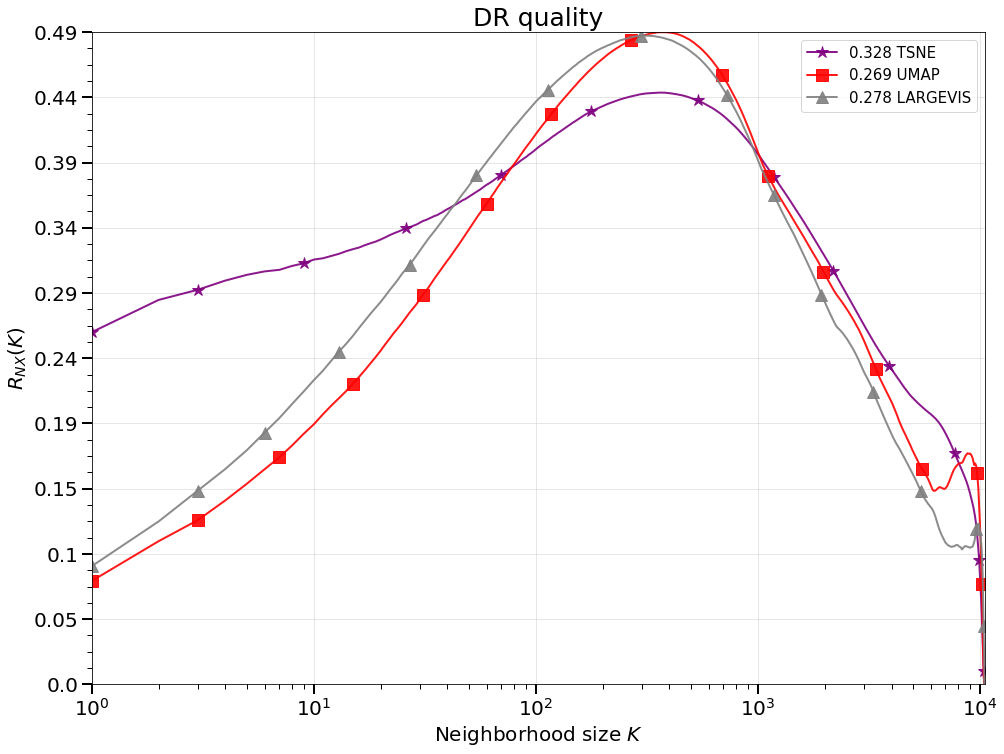

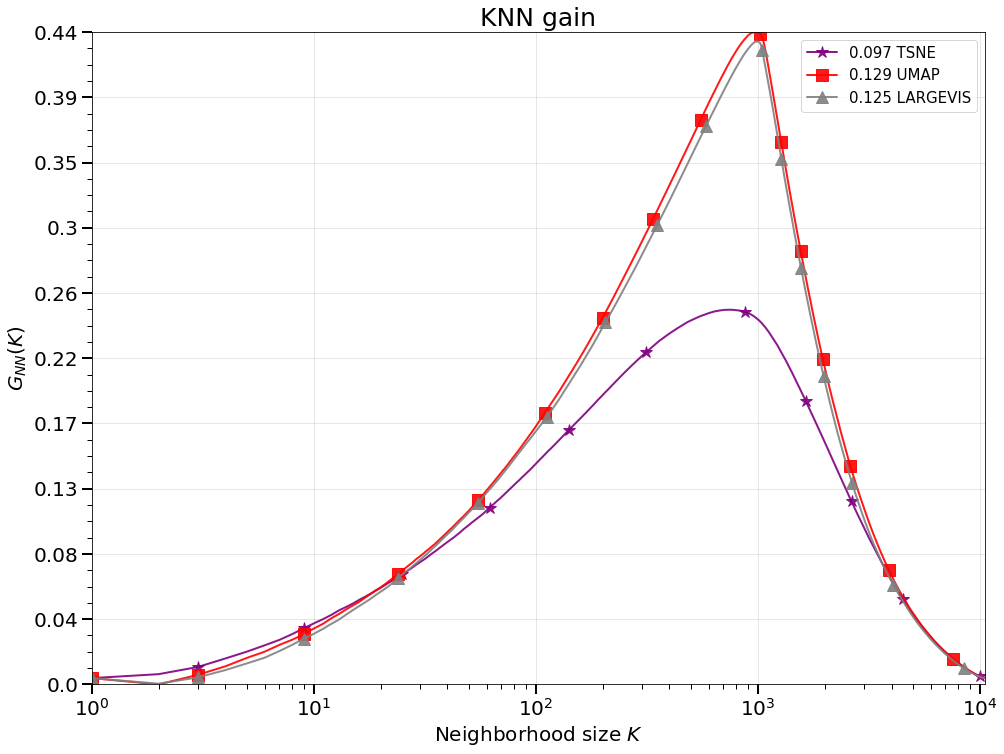

In [31]:
mnist_local_metric.visualize()

## FMNIST

In [34]:
fmnist_local_metric = LocalMetric()

fmnist_local_metric.calculate_knn_gain_and_dr_quality(
    X_lds=fmnist_tsne,
    X_hds=fmnist.data.values,
    labels=fmnist.target.values.to_numpy(dtype=np.int8),
    method_name="TSNE",
)

fmnist_local_metric.calculate_knn_gain_and_dr_quality(
    X_lds=umap_fmnist.embedding_,
    X_hds=fmnist.data.values,
    labels=fmnist.target.values.to_numpy(dtype=np.int8),
    method_name="UMAP",
)

fmnist_local_metric.calculate_knn_gain_and_dr_quality(
    X_lds=fmnist_largevis_points,
    X_hds=fmnist.data.values,
    labels=fmnist.target.values.to_numpy(dtype=np.int8),
    method_name="LARGEVIS",
)

Calculating d_hd
TSNE
Calculating d_hd
UMAP
Calculating d_hd
LARGEVIS


Finished.


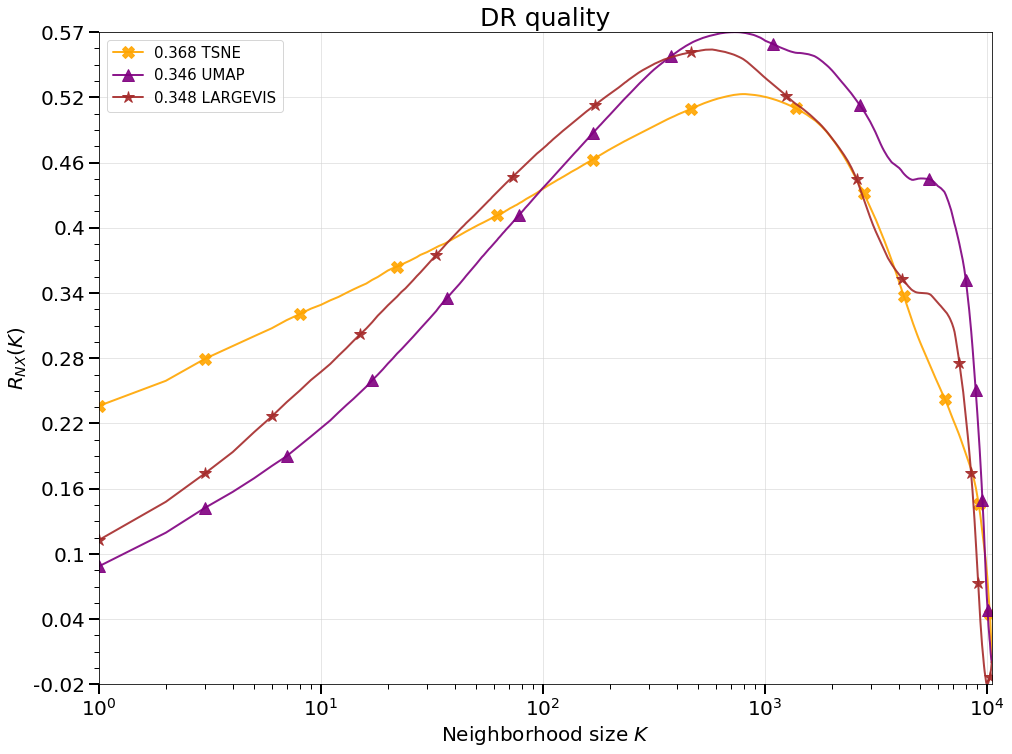

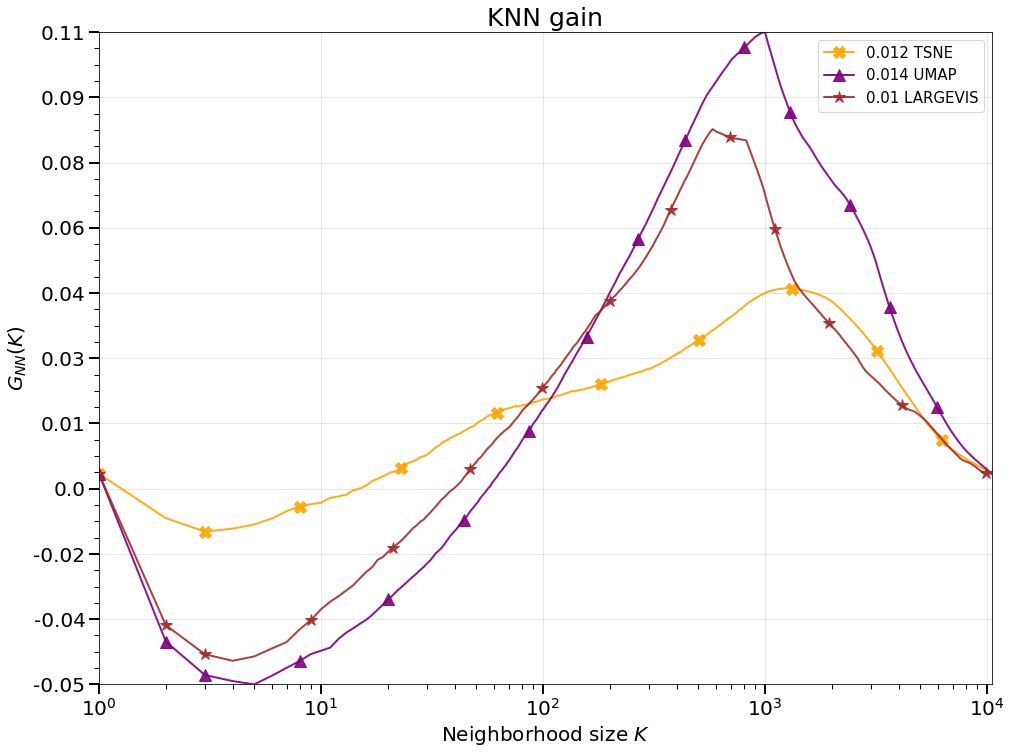

In [38]:
fmnist_local_metric.visualize()